# Lab 9

### Enter the Lab9 password as a string

In [366]:
password = 'prime'

**Upload 2 files** to Gradescope:
* **Lab9.py** (for the autograder)
* **Lab9.ipynb** (for manual grading)

**Download 2 files** from Canvas:
* sudoku1.txt
* sudoku2.txt
___

In [368]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Array Statistics
Write a function **`array_stats(arr)`** that takes an array of numbers and returns the following information in an array:
* mean of the numbers
* median of the numbers
* variance of the numbers
* standard deviation of the numbers

**Use numpy functions** `.mean()`, `np.median()`, `np.var()`, and `np.std()`.)

Example: 
```
arr = np.arange(1, 6, 0.5).reshape(2, 5)
array_stats(arr)
```
returns 
```
array([3.25      , 3.25      , 2.0625    , 1.436141])
```

In [370]:
def array_stats(arr):
    mean = arr.mean()
    median = np.median(arr)
    var = np.var(arr)
    std = np.std(arr)
    return np.array([mean, median, var, std])

In [371]:
arr = np.arange(1, 6, 0.5).reshape(2, 5)
array_stats(arr)

array([3.25      , 3.25      , 2.0625    , 1.43614066])

### Dimes and Nickels

Suppose you have a collection of dimes and nickels. Given the number of coins and the total value in dollars, you can determine the quantity of each coin. Write a function **`dimes_nickels(ncoins, value)`** that returns a numpy array of two `int`s corresponding to the number of dimes and nickels, respectively. The function should use numpy functions as follows:

* Method 1 (if you don't know what a matrix inverse is): Your function should use the numpy **`LA.solve()`** function.
* Method 2 (if you know what a matrix inverse is): Your function should use **`LA.inv()`** to calculate the matrix inverse, then apply the `@` operator to multiply the inverse by the appropriate vector.

*Hint:* These numpy routines will return floating point values. Use `np.round()` to round the result and `.astype()` to convert to ints.

Example:  
`dimes_nickels(30, 2.15)` returns `array([13, 17])` corresponding to 13 dimes and 17 nickels.

In [373]:
def dimes_nickels(ncoins, value):
    coef1 = np.ones(2)
    coef2 = np.array([0.1, 0.05])
    mat = np.vstack([coef1, coef2])
    DN = np.array([ncoins, value])
    coins = LA.inv(mat) @ DN
    return np.round(coins).astype(int)

In [374]:
dimes_nickels(30, 2.15)

array([13, 17])

### Normal Distribution
The *normal distribution* (or *Gaussian distribution*) with mean $\mu$ (mu) and standard deviation $\sigma$ (sigma) can be represented by the function 
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-(x-\mu)^2/(2\sigma^2)}.$$

Write a function **`normal(x, mu, sigma)`** that returns the value of this function for a given value of $x$, mean $\mu$, and standard deviation $\sigma$.

Example: `normal(90, 100, 30)` returns `0.012579`.

In [376]:
def normal(x, mu, sigma):
    coef = 1 / (sigma * np.sqrt(2*np.pi))
    e = np.e**(-(x-mu)**2 / (2*sigma**2))
    return coef*e

In [377]:
normal(90, 100, 30)

0.012579440923099774

### Plotting with Vectorization
**IMPORTANT:** For the rest of the semester, when plotting, **use numpy vectorization** to calculate function values, *not* a loop or list comprehension.

**Plot the normal distribution** with $\mu=100$ and $\sigma=30$ on the interval $[0, 200]$. Call the `normal()` function.

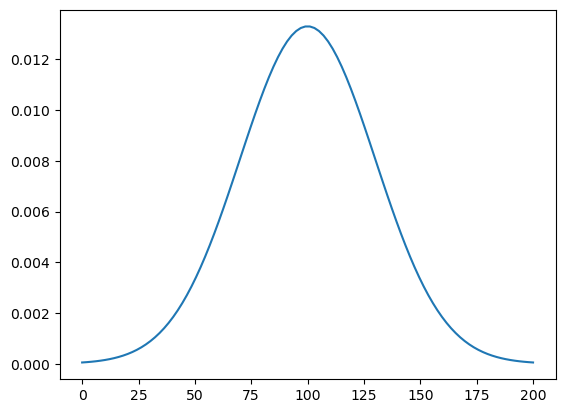

In [426]:
xvals = np.linspace(0, 200, 100)
yvals = normal(xvals, 100, 30)
plt.plot(xvals, yvals)
plt.show()

### Standard Deviations
The function **`plt.fill_between(xvals, yvals)`** adds color to the region between a curve defined by `xvals, yvals` and the $x$-axis. Use this function to show the regions within 1, 2, and 3 standard deviations from the mean (approximately 68%, 95%, and 99.7% of the total area, respectively). Label the $x$-axis using `plt.xticks()`. It is not necessary to match the colors shown. 

You may wish to use the transparency parameter `alpha` which takes a value from 0 to 1 (larger values produce darker colors).

<img src="http://www.coloradomath.org/python/normal-std.jpg" width="432" height="288" />

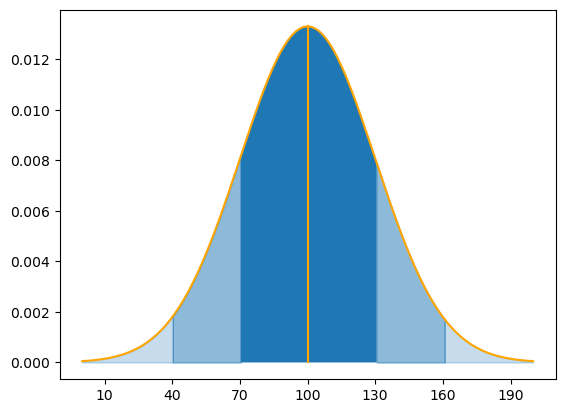

In [428]:
xvals = np.linspace(0, 200, 200)
yvals = normal(xvals, 100, 30)
plt.plot(xvals, yvals, c='orange')
plt.fill_between(xvals[70:131], yvals[70:131])
plt.fill_between(xvals[0:41], yvals[0:41], color='C0', alpha=0.25)
plt.fill_between(xvals[40:71], yvals[40:71], color='C0', alpha=0.5)
plt.fill_between(xvals[130:161], yvals[130:161], color='C0', alpha=0.5)
plt.fill_between(xvals[160:200], yvals[160:200], color='C0', alpha=0.25)
plt.plot([100, 100], [0, max(yvals)], c='orange')
plt.xticks([10, 40, 70, 100, 130, 160, 190])
plt.show()

### Sudoku 3x3
In a $9\times 9$ Sudoku square, each of the nine $3\times 3$ subgrids contain all of the digits from 1 to 9. 

$$\begin{array}{|c|c|c|}
\hline
9&3&4\\
\hline
5&1&7\\
\hline
6&8&2\\
\hline
\end{array}
$$

Write a function **`sudoku_3x3(grid)`** that returns `True` if a $3\times 3$ array is a valid Sudoku subgrid. 

Check to see if these squares are valid.
```
grid1 = np.array([[9, 3, 4], [5, 1, 7], [6, 8, 2]])
grid2 = np.array([[9, 3, 4], [5, 1, 7], [4, 8, 2]])
grid3 = np.array([[9, 3, 4], [5, 1, 7], [14, 8, 2]])
``` 


In [383]:
def sudoku_3x3(grid):
    return sorted(grid.flatten()) == list(range(1, 10))

In [384]:
grid1 = np.array([[9, 3, 4], [5, 1, 7], [6, 8, 2]])
grid2 = np.array([[9, 3, 4], [5, 1, 7], [4, 8, 2]])
grid3 = np.array([[9, 3, 4], [5, 1, 7], [14, 8, 2]])

In [385]:
sudoku_3x3(grid1)

True

In [386]:
sudoku_3x3(grid2)

False

In [387]:
sudoku_3x3(grid3)

False

### Sudoku 9x9
In a Sudoku square, each row, column, and each of the nine $3\times 3$ subgrids contain all of the digits from 1 to 9. 

 <img src="http://www.coloradomath.org/python/sudoku.png" width="200" />

Write a function **`sudoku(square)`** that returns `True` if a $9\times 9$ array `square` is a valid Sudoku square. The function should call `sudoku_3x3()`.

Test your code on these three $9\times 9$ squares:
```
sudoku1 = np.loadtxt('sudoku1.txt', dtype=int)
sudoku2 = np.loadtxt('sudoku2.txt', dtype=int)
sudoku3 = [[random.randint(1, 9) for col in range(9)] 
           for row in range(9)]
```

In [389]:
sudoku1 = np.loadtxt('sudoku1.txt', dtype=int)
sudoku2 = np.loadtxt('sudoku2.txt', dtype=int)
sudoku3 = [[random.randint(1, 9) for col in range(9)] 
           for row in range(9)]

In [390]:
def sudoku(square):
    for row in square:
        if sorted(row) != list(range(1, 10)):
            return False

    for col in square.T:
        if sorted(col) != list(range(1, 10)):
            return False
    
    for row in range(0, 9, 3):
        for col in range(0, 9, 3):
            if not sudoku_3x3(square[row:row+3, col:col+3]):
                return False
    
    return True

In [391]:
sudoku(sudoku1)

True

In [392]:
sudoku(sudoku2)

False

In [393]:
sudoku(sudoku3)

False

___

# Extra Problems
Work on these problems after completing the previous exercises.

# Z-Score
A *z-score* or *standard score* is the number of standard deviations a data value is located, above or below the mean. For example, in the above exercise, the value 160 has a z-score of 2 because it is 2 standard deviations above the mean, and the value 70 has a z-score of -1 because it is 1 standard deviation below the mean.

Write a function **`z_score(x, mu, sigma)`** that calculates the z-score for a value `x` in a distribution with mean $\mu$ and standard deviation $\sigma$. The formula is 
$$ z = \frac{x-\mu}{\sigma}.$$

Example:
```
xvals = np.array([70, 80, 190])
z_score(xvals, 100, 30)
```
returns
```
array([-1.        , -0.66666667,  3.        ])
```

### Random Normal Distribution
The **`np.random.normal(mu, sigma, size)`** function returns `size` random values from a normal distribution with mean `mu` and standard deviation `sigma`. 
Call `np.random.normal()` with $\mu=100$, $\sigma=30$, and `size=1000`. Store the resulting 1000 values in **`normal_randnums`**.

In [397]:
# normal_randnums = 

Call **`plt.hist(normal_randnums, 20, density=True)`** to display the distribution of `normal_randnums` using 20 bins. The `density` parameter scales the area under the curve to 1. Superimpose the corresponding normal curve.

Here is a sample plot:

<img src="http://www.coloradomath.org/python/normal-random.jpg" width="432" height="288" />

### Flipping Pennies

Imagine $n$ pennies lined up in a row, all facing down and showing Tail. Suppose there are $n$ students. 
* Student 1 flips over every penny so that now all are showing Head.  
* Student 2 flips over every other penny beginning with the second one.  
* Student 3 flips over every third penny beginning with the third one. 
* Student $k$ flips over every $k$th penny beginning with the $k$th one.

For example if $n = 5$ the process looks like this:

|Stage|Coins|
|:---:|:---:|
|Initial|`TTTTT`|
|After Student 1|`HHHHH`|
|After Student 2|`HTHTH`|
|After Student 3|`HTTTH`|
|After Student 4|`HTTHH`|
|After Student 5|`HTTHT`|

After all 5 students are done, the coins in positions 1 and 4 are showing Head.

Write a function **`flip_pennies(n)`** that **models the above process** for `n` pennies and `n` students, and returns a list of the final positions that show Head. (*Hint:* Let `True` represent Head and `False` represent Tail. Then the `not` operation can be used to flip the coins.)

Example: `flip_pennies(5)` returns `[1, 4]`.